In [5]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
df = pd.read_csv("../data/fintech_reviews.csv")
df.head()


,review,rating,date,bank,source
0,good,5,2025-06-03 11:32:52,CBE,Google Play
1,it is not safety,1,2025-06-03 09:14:31,CBE,Google Play
2,NICE bank,5,2025-06-03 08:42:36,CBE,Google Play
3,abdii.abas ab.musa,3,2025-06-02 14:46:11,CBE,Google Play
4,it is like a childish app make it better the w...,1,2025-06-02 12:23:42,CBE,Google Play


In [7]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1447 non-null   object
 1   rating  1447 non-null   int64 
 2   date    1447 non-null   object
 3   bank    1447 non-null   object
 4   source  1447 non-null   object
dtypes: int64(1), object(4)
memory usage: 56.7+ KB


review    0
rating    0
date      0
bank      0
source    0
dtype: int64

Clean the Data

Drop Missing or Empty Reviews


In [8]:
df.dropna(subset=["review", "rating"], inplace=True)
df = df[df["review"].str.strip() != ""]


Remove Duplicates

In [9]:
df.drop_duplicates(subset=["review", "rating", "date", "bank"], inplace=True)


Normalize The Date Format

In [10]:
df["date"] = pd.to_datetime(df["date"])


TASK 2

Sentiment and Thematic Analysis

Label Sentiment

In [11]:
def label_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df["sentiment"] = df["rating"].apply(label_sentiment)


Text Preprocessing

In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\@w+|\#", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.strip()
    return text

df["clean_review"] = df["review"].apply(clean_text)


TF-IDF Vectorization

In [13]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["clean_review"])
y = df["sentiment"]


Train/Test Sentiment Model (Logistic Regression)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Evaluation

c:\Users\ads\Desktop\Week 2\fintech-cx\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ads\Desktop\Week 2\fintech-cx\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ads\Desktop\Week 2\fintech-cx\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

              precision    recall  f1-score   support

    negative       0.85      0.59      0.70        69
     neutral       0.00      0.00      0.00        16
    positive       0.83      0.98      0.90       205

    accuracy                           0.83       290
   macro avg       0.56      0.52      0.53       290
weighted avg       0.79      0.83      0.80       290



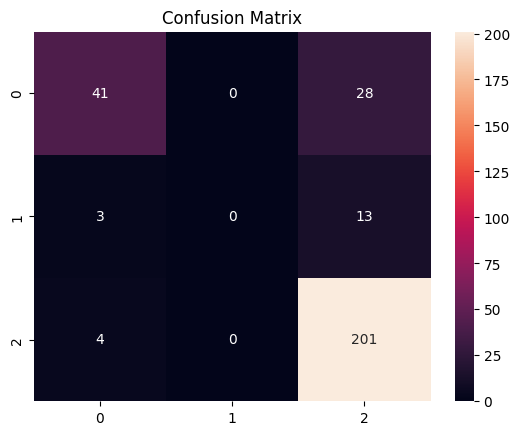

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

In [16]:
df.to_csv("../data/fintech_reviews_cleaned.csv", index=False)
